# Star Type Classification using 5 Machine Learning (ML) Methods

## Introduction

This notebook makes use of the star dataset and aims to apply and subsequently evaluate different Machine Learning (ML) methods based upon their ability to classify star types based upon the values of other variables within the dataset. Specifically, this notebook applies a (i) Random Forest Classifier, (ii) Support Vector Classifier, (iii) K-Nearest Neighbour Classifier, (iv) Gaussian Naive Bayes Classifier and (v) a Deep Learning Multilayer Perceptron Classifier, with the Random Forest Classifier usually displaying the best performance.

This notebook is split up into five different sections as follows:

**1) Stage 1: Data Description & Data Exploration**

**2) Stage 2: Data Preprocessing**

**3) Stage 3: Splitting the training/testing data subsets**

**4) Stage 4: Model fitting and evaluation**

**5) Stage 5: Model Comparison**

In [302]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


## Stage 1: Data Description & Exploration

The first step aims to provide an introduction to the data. Specifically, this involves loading in the data (1.1), providing a brief description of the data being used (1.2) as well an exploration of the data (1.3).

### 1.1 Load the data

First load in the dataset using the pandas '.read_csv()' method, as below:

In [303]:
# load in the 6 class csv
df = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')

### 1.2 Describe the data 

The following code segments provide a brief description of the data that will be used. Specifically, the first few rows are inspected using the pandas '.head()' method, whilst the dataset is described using the pandas '.describe()' and the dimensions of the dataset are obtained using the pandas '.shape' method.

In [304]:
# inspect the first few rows of the dataset
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [305]:
# provide a column-wise statistical description of the dataframe
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [306]:
# obtain the shape of the dataframe (no. rows x no. columns)
print(df.shape)

(240, 7)


### 1.3 Data Exploration

In [307]:
# import visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

# set visualisation parameters
sns.set(rc={'figure.figsize': (45.0, 20.0)})
sns.set(font_scale=8.0)
sns.set_context("notebook", font_scale=5.5, rc={"lines.linewidth": 0.5})

The data can be plotted first to examine the relationships outlined by the dataset origin:

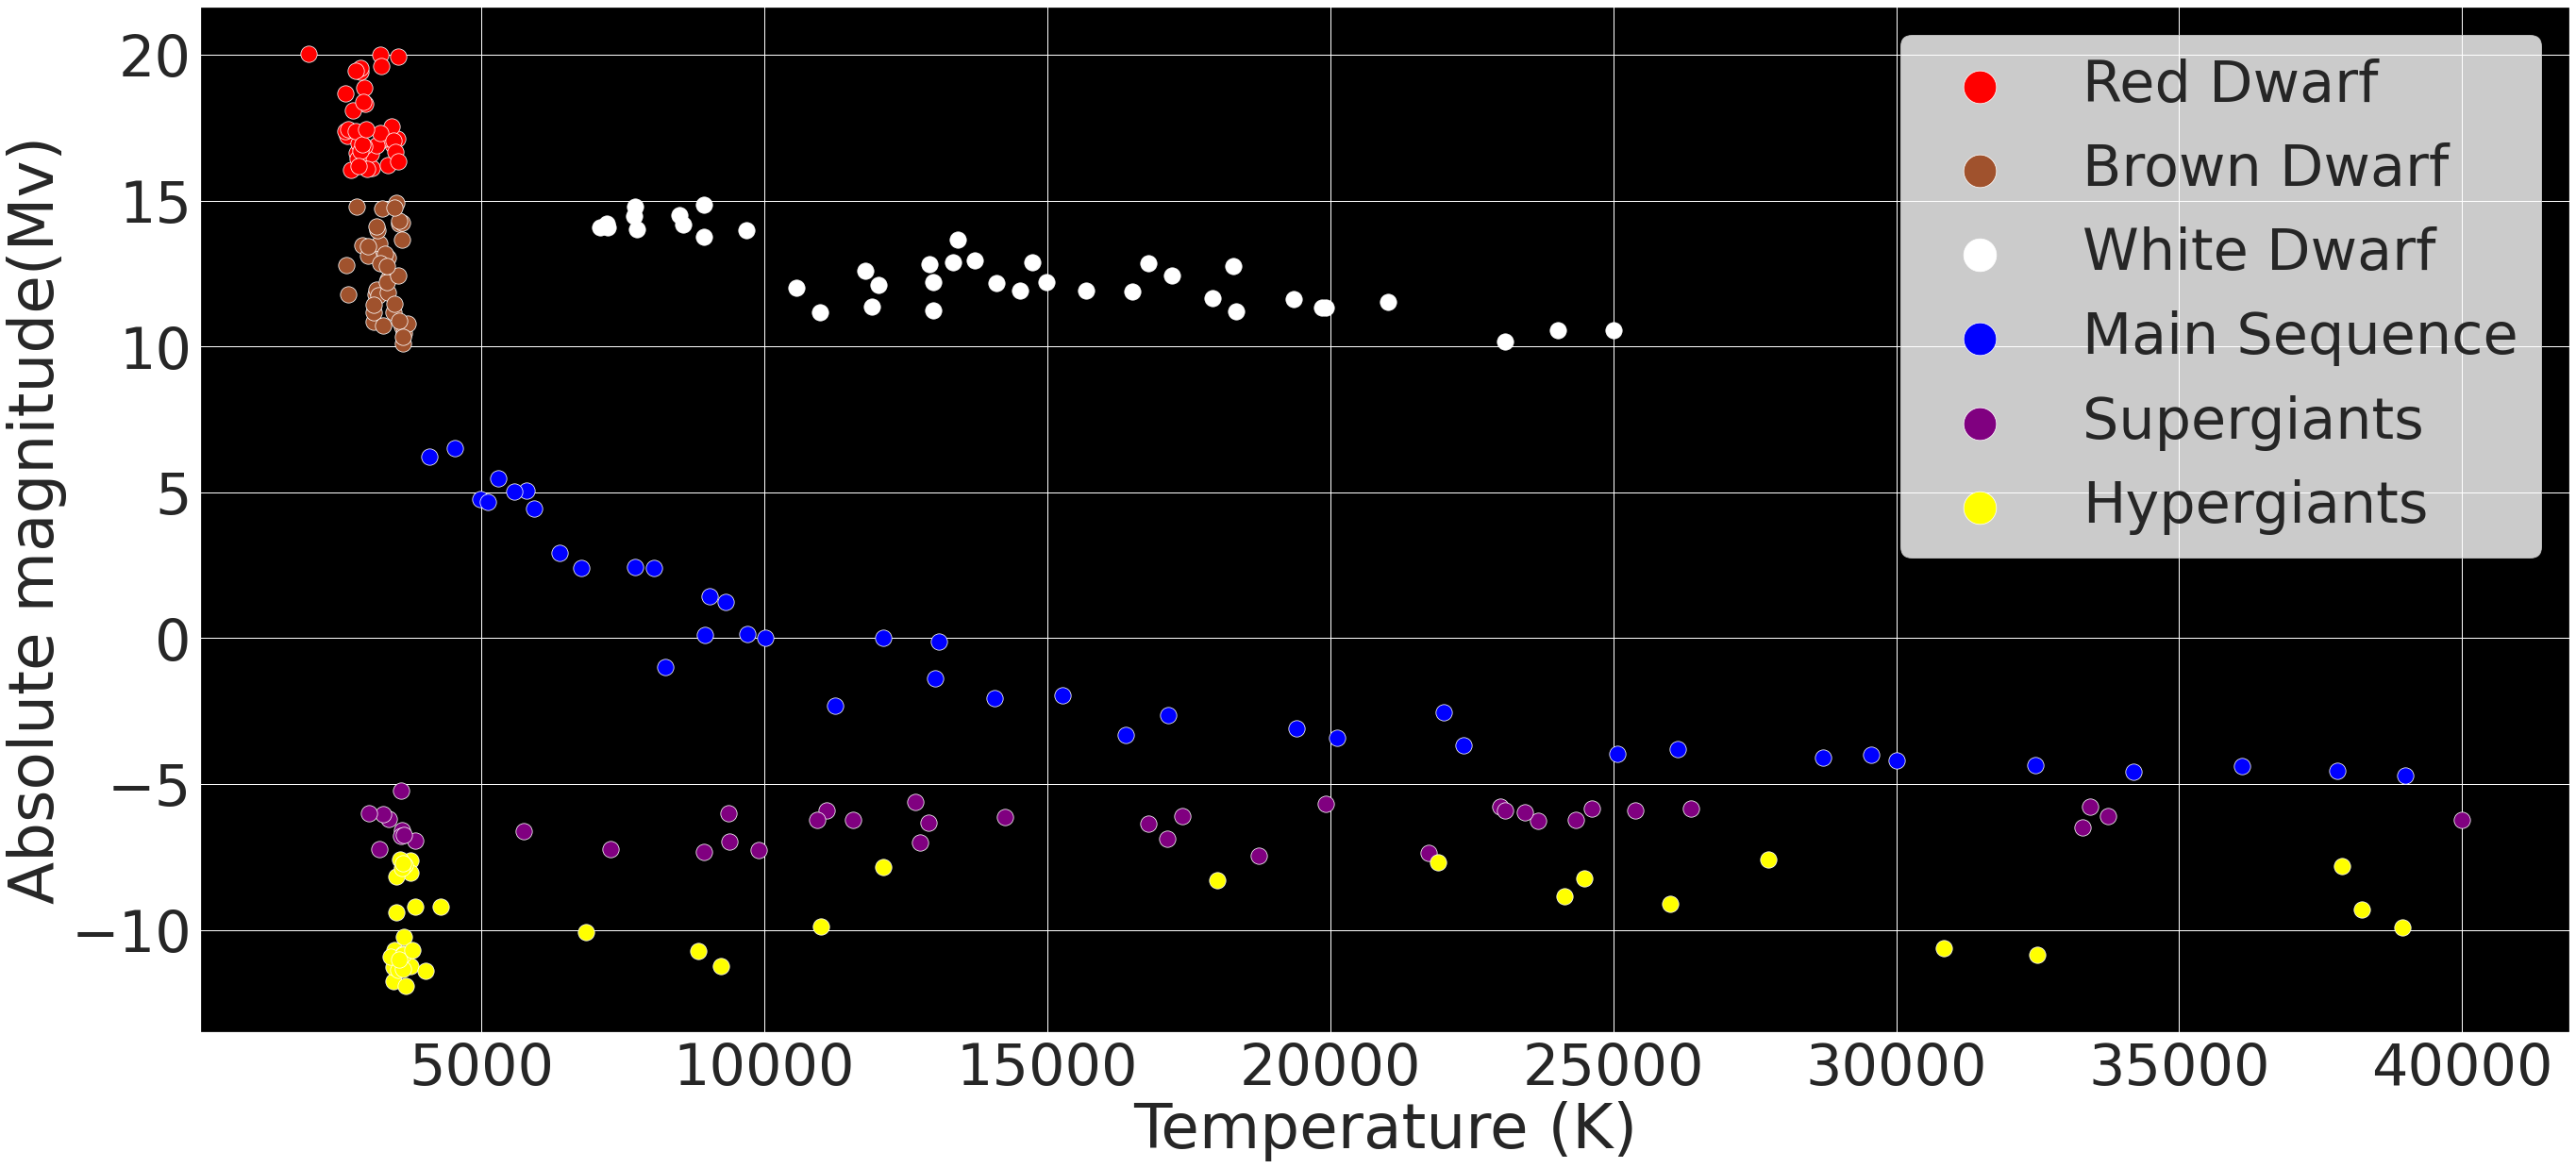

In [308]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white', 
            'figure.figsize': (45.0, 20.0)}, font_scale=8.0)
ax = sns.set_context("notebook", font_scale=5.5, rc={"lines.linewidth": 0.5})

ax = sns.scatterplot(data=df[df['Star type'] == 0], x="Temperature (K)", y="Absolute magnitude(Mv)",
                s=300, color='red')
ax = sns.scatterplot(data=df[df['Star type'] == 1], x="Temperature (K)", y="Absolute magnitude(Mv)",
                s=300, color='sienna')
ax = sns.scatterplot(data=df[df['Star type'] == 2], x="Temperature (K)", y="Absolute magnitude(Mv)",
                s=300, color='white')
ax = sns.scatterplot(data=df[df['Star type'] == 3], x="Temperature (K)", y="Absolute magnitude(Mv)",
                s=300, color='blue')
ax = sns.scatterplot(data=df[df['Star type'] == 4], x="Temperature (K)", y="Absolute magnitude(Mv)",
                s=300, color='purple')
ax = sns.scatterplot(data=df[df['Star type'] == 5], x="Temperature (K)", y="Absolute magnitude(Mv)",
                s=300, color='yellow')

plt.legend(['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiants', 'Hypergiants'],
          facecolor='w', markerscale=2)
plt.show()

The distributions of the data corresponding to variables 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)' and 'Absolute magnitude(Mv)' are visualised with the following code segments:

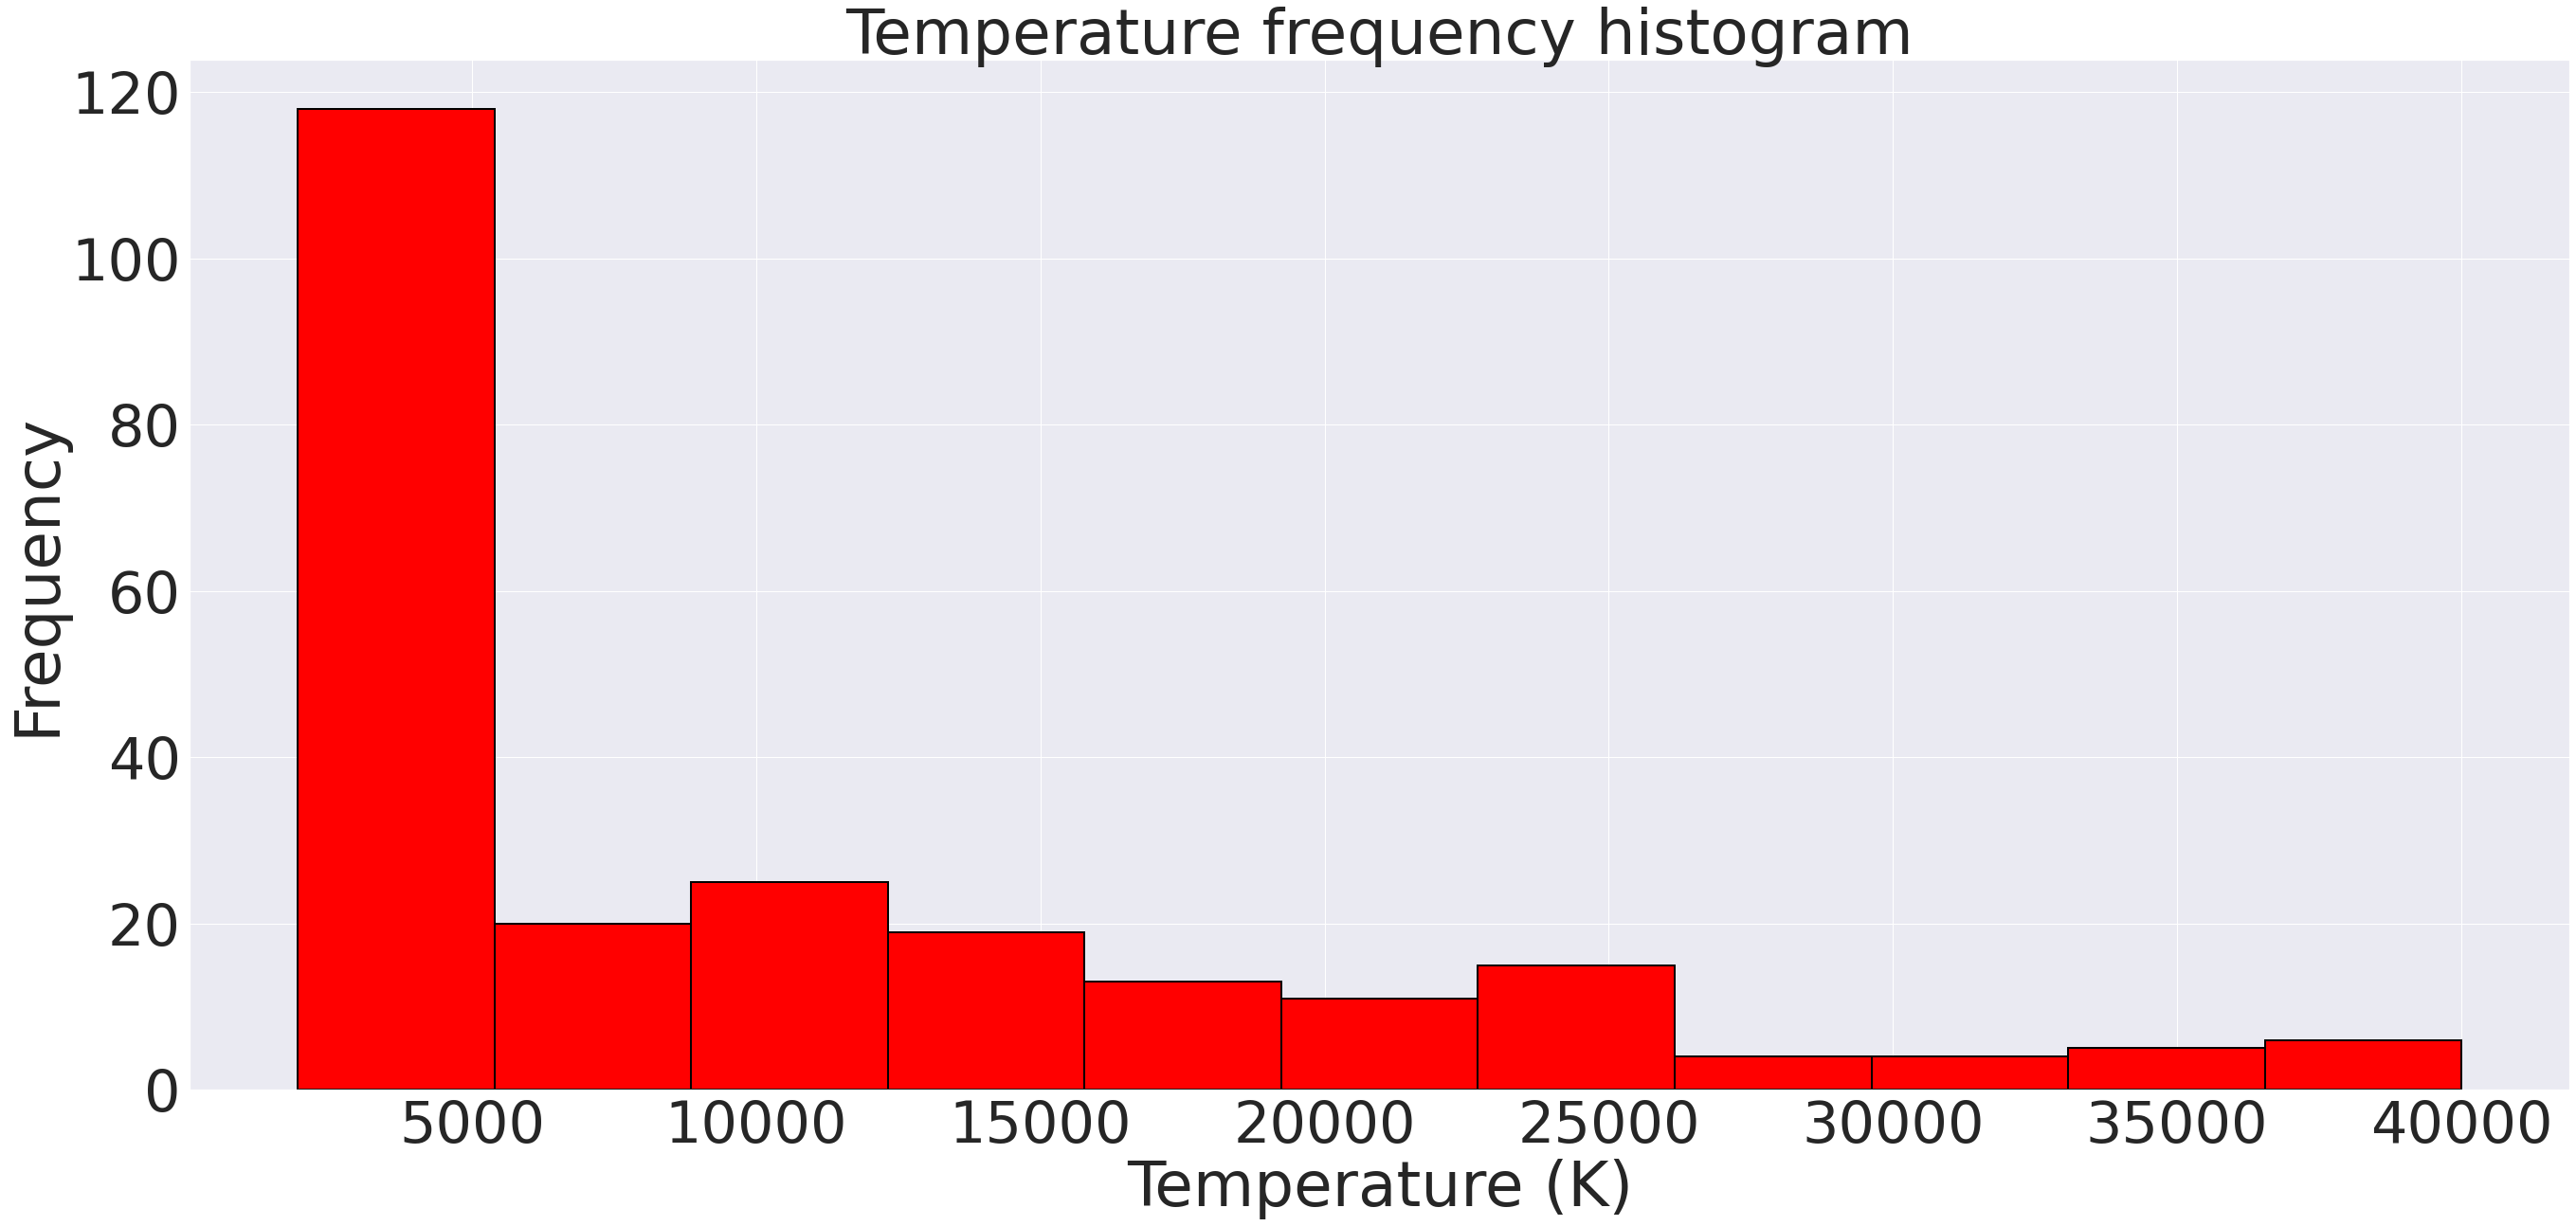

In [309]:
# set visualisation parameters
sns.set(rc={'figure.figsize': (45.0, 20.0)})
sns.set(font_scale=8.0)
sns.set_context("notebook", font_scale=5.5, rc={"lines.linewidth": 0.5})

# plot the distribution of the temperature variable
plt.hist(df['Temperature (K)'], bins='auto', color='red', edgecolor='black', linewidth=2.0)
plt.gca().set(title='Temperature frequency histogram', ylabel='Frequency', xlabel='Temperature (K)')
plt.show()

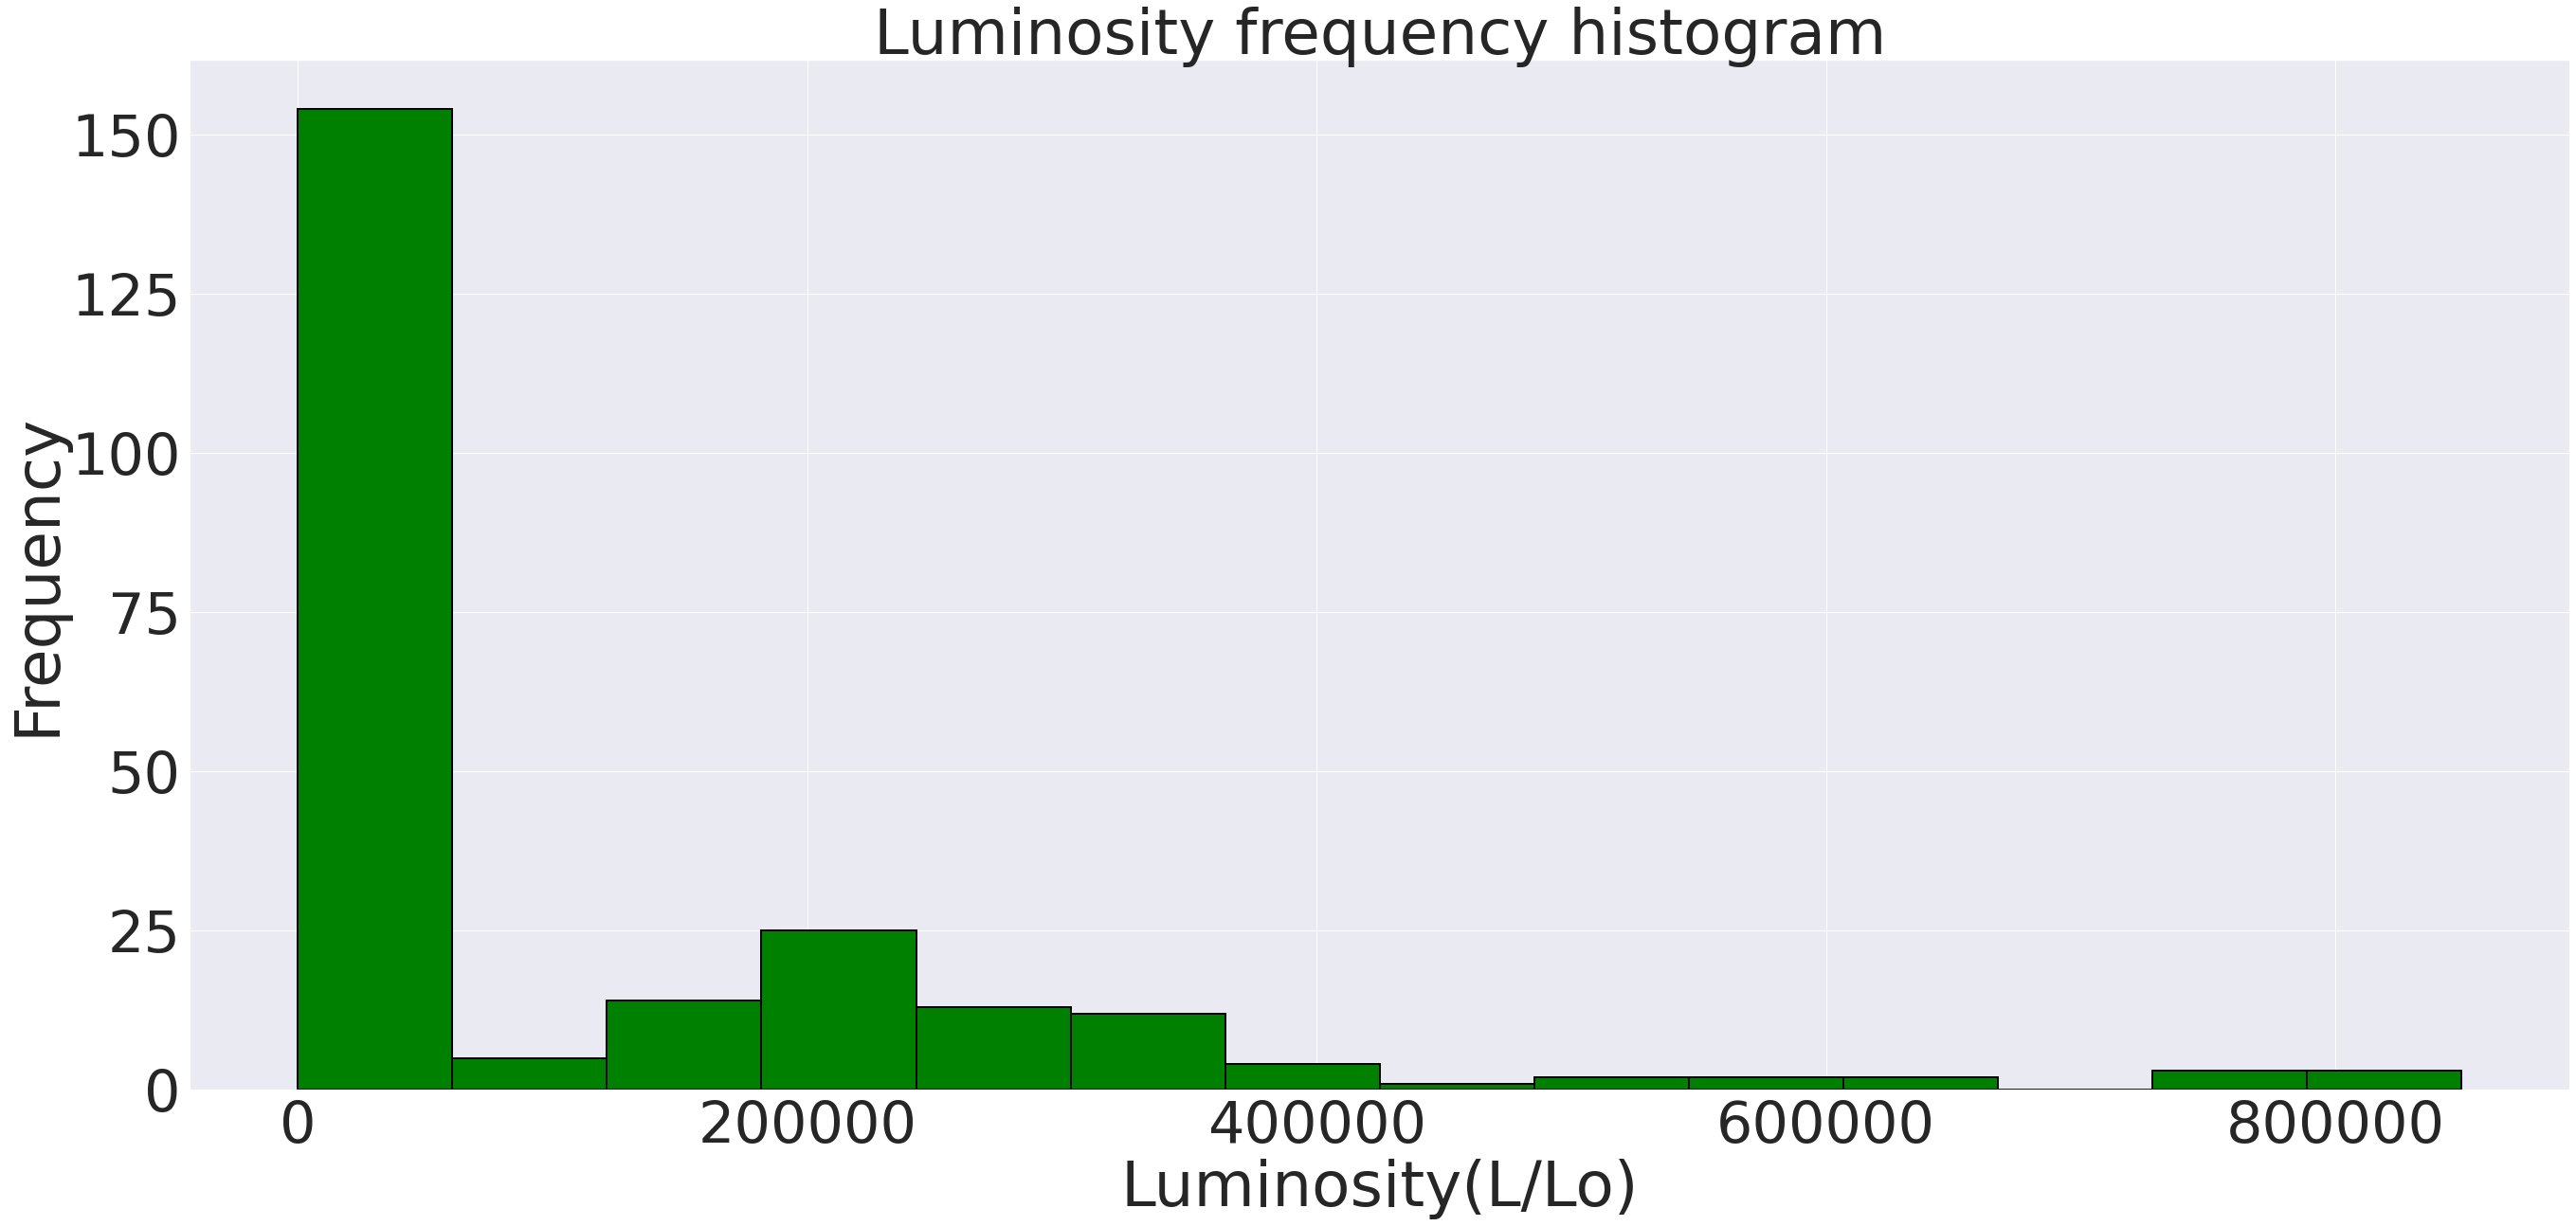

In [310]:
# plot the distribution of the luminosity variable
plt.hist(df['Luminosity(L/Lo)'], bins='auto', color='green', edgecolor='black', linewidth=2.0)
plt.gca().set(title='Luminosity frequency histogram', ylabel='Frequency', xlabel='Luminosity(L/Lo)')
plt.show()

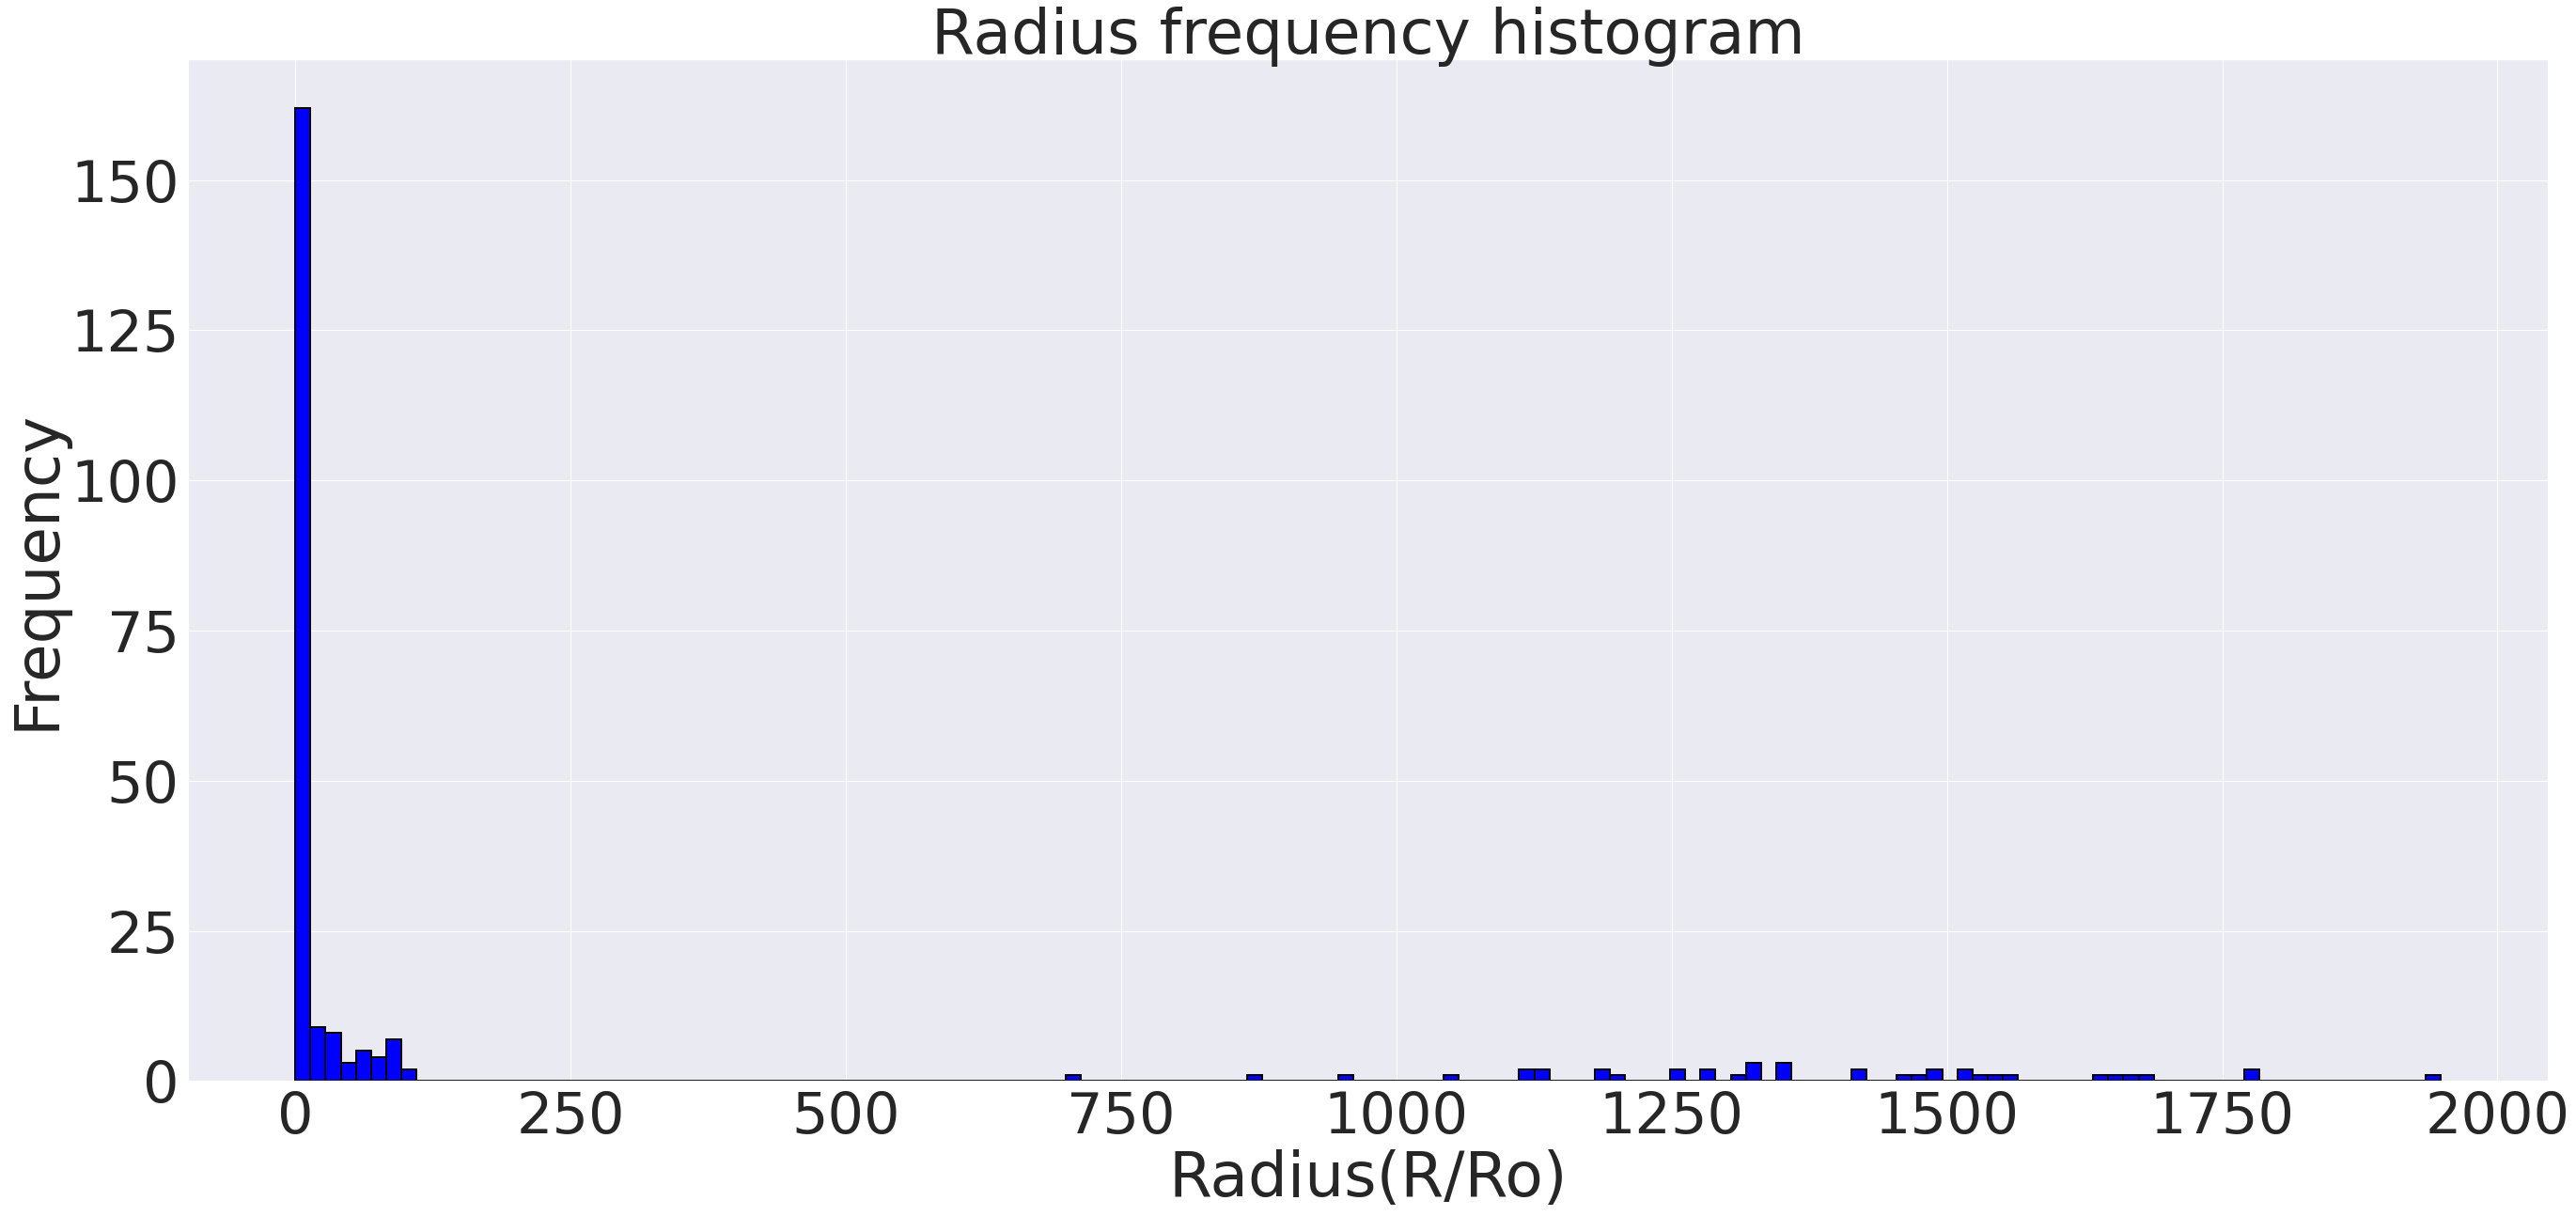

In [311]:
# plot the distribution of the radius variable
plt.hist(df['Radius(R/Ro)'], bins='auto', color='blue', edgecolor='black', linewidth=2.0)
plt.gca().set(title='Radius frequency histogram', ylabel='Frequency', xlabel='Radius(R/Ro)')
plt.show()

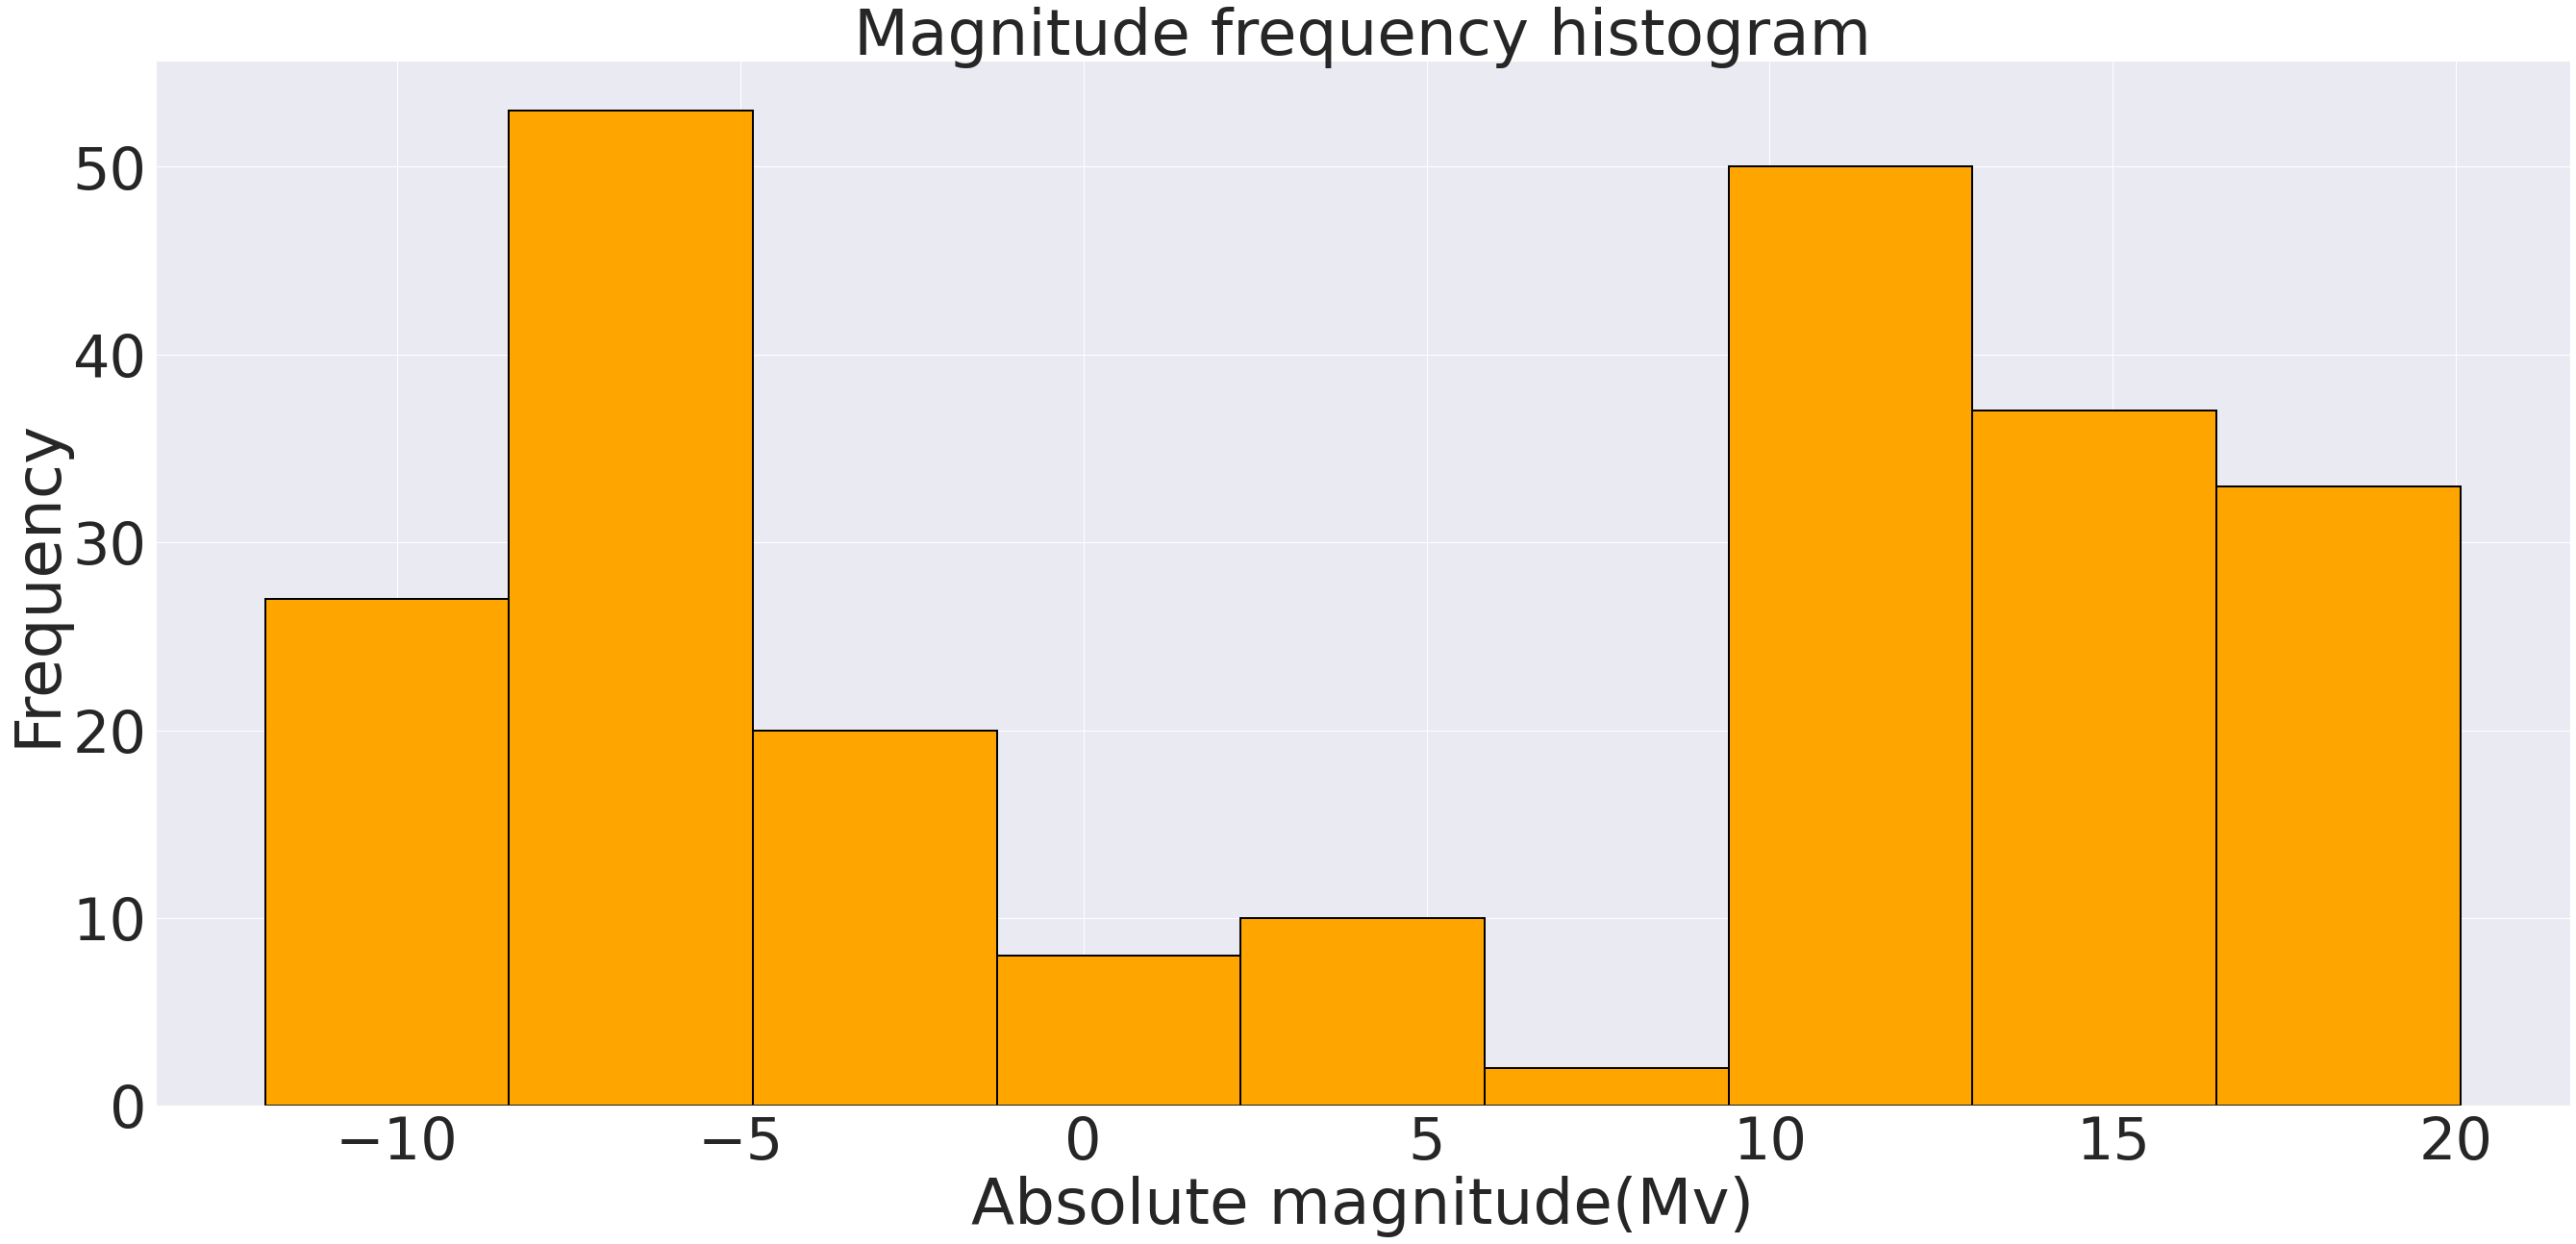

In [312]:
# plot the distribution of the magnitude variable
plt.hist(df['Absolute magnitude(Mv)'], bins='auto', color='orange', edgecolor='black', linewidth=2.0)
plt.gca().set(title='Magnitude frequency histogram', ylabel='Frequency', xlabel='Absolute magnitude(Mv)')
plt.show()

## Stage 2: Data Preprocessing

The second stage aims to processing the existing data into a format that can be understood effectively by a machine. Specifically this involves datatype conversions (2.1) and data scaling (2.2).

### 2.1 Datatype conversions

It is important that all variables are in a numerical format for them to be understood effectively by a machine. Therefore, the datatypes of the dataframes need to be inspected and converted appropriately where necessary.

In [313]:
# obtain the data types of each column within the data frame
print(df.dtypes)

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object


As can be seen from the code segment which printed the datatypes, the 'Temperature (K)' and 'Star type' column values are stored as an integer ('int64') format. These are converted to floats, as follows:

In [314]:
# convert columns to 'float64' from 'int64'
df['Temperature (K)'] = df['Temperature (K)'].astype(float)
df['Star type'] = df['Star type'].astype(float)

It can also be noticed that the 'Star colour' and 'Spectral Class' columns are stored in 'Object format' as they are categorical variables. With this in mind, they need to be converted into numerical values which a predictive model can understand. This type of conversion is referred to as 'Encoding'.

Two common forms of encoding are 'Label Encoding' and 'One Hot Encoding'. Label Encoding involves converting each unique value within a column into a numerical value of 0, 1, 2, 3 and so on. However, a limitation of Label Encoding is the fact that a predictive model may interpret these converted values as ordinal/qualitative in nature which can cause this data to be misunderstood. With this limitation being considered, One Hot Encoding can also be used. This form of encoding takes a column with n-number of categorical values and 'splits' this into n-number of new columns which correspond to each unique categorical value, with each row within these new columns containing either a 0 or 1, depending on whether each row contains a specific column value. One Hot Encoding will be used in this case because it avoids the misinterpretation of encoded values associated with the Label Encoding.

This is done as follows using the Pandas '.get_dummies() method:

In [315]:
# obtain One Hot Encoding of the 'Star color' and 'Spectral Class' columns
star_col_dummies = pd.get_dummies(df['Star color'], dtype=float)
spec_cla_dummies = pd.get_dummies(df['Spectral Class'], dtype=float)

# remove original columns from the main dataframe
df = df.drop(['Star color', 'Spectral Class'], axis=1)

# join the One Hot Encoded dataframes onto the main dataframe
df = pd.concat([df, star_col_dummies], axis=1)
df = pd.concat([df, spec_cla_dummies], axis=1)

### 2.2 Data scaling

Data is then scaled in order to accelerate the calculations involved within the predictive modelling. The One Hot Encoded variables do not require scaling, nor does the star type. The variables are scaled using a min-max scaler. However, since the 'Temperature (K)', 'Luminosity(L/Lo)' and 'Radius(R/Ro)' variables display a somewhat exponential distribution, they are also scaled logarithmically prior to the min-max scaler being applied. Meanwhile 'Absolute magnitude(Mv)' is scaled using a min-max scaler without the use of the logarithmic scaling.

In [316]:
from sklearn.preprocessing import MinMaxScaler

# variables with the exponential distribution scaled logarithmically
df['Temperature (K)'] = np.log(df['Temperature (K)'])
df['Luminosity(L/Lo)'] = np.log(df['Luminosity(L/Lo)'])
df['Radius(R/Ro)'] = np.log(df['Radius(R/Ro)'])

# define the scaler
scaler = MinMaxScaler()

# variables now scaled with the minmax scaler
df['Temperature (K)'] = scaler.fit_transform(np.expand_dims(df['Temperature (K)'], axis=1))
df['Luminosity(L/Lo)'] = scaler.fit_transform(np.expand_dims(df['Luminosity(L/Lo)'], axis=1))
df['Radius(R/Ro)'] = scaler.fit_transform(np.expand_dims(df['Radius(R/Ro)'], axis=1))
df['Absolute magnitude(Mv)'] = scaler.fit_transform(np.expand_dims(df['Absolute magnitude(Mv)'], axis=1))

## Stage 3: Splitting training/testing sets

Now that the data has been preprocessed, we will split the data into training and testing x and y values. A 75-25 percent training/test split is used in this case.

In [317]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# split our x and y values into new dataframes
X_values = df.drop(['Star type'], axis=1)
y_values = df['Star type']

# now split our x and y values into train/test sets with a 75/25 percentage split
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.25)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (180, 30)
X_test shape is (60, 30)
y_train shape is (180,)
y_test shape is (60,)


## Stage 4: Models Fitting & Evaluation

This fourth stages involves fitting the various different models, and subsequently evaluating them. The models used are the Random Forest Classifier (4.1), the Support Vector Classifier (4.2), the K-Nearest Neighbour Classifier (4.3), the Gaussian Naive Bayes Classifier (4.4) and a Deep Learning Multilayer Perceptron Classifier (4.5).

First, the evaluation metrics are imported:

In [318]:
# import evaluation metrics
from sklearn import metrics

### 4.1 Random Forest Classifier

The first model applied is scikit-learn's Random Forest Classifier, which fits a number of decision tree classifiers on various sub-samples of the dataset. Averaging is applied to improve the predictive accuracy and control over-fitting. 

The Random Forest Classifier model is fit with the following code:

In [319]:
# import random forest classifier model
from sklearn.ensemble import RandomForestClassifier

# define our random forest classifier
rfc = RandomForestClassifier(n_estimators=100)

# train the model using the x and y training sets
rfc.fit(X_train,y_train)

RandomForestClassifier()

The model is then applied on unseen testing data, and its performance evaluated:

In [320]:
# apply the model on unseen testing data
rfc_preds = rfc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, rfc_preds))

Accuracy: 1.0


The Random Forest Classifier used appears to be very accurate, with testing data accuracy scores usually being 1.0 (100% accuracy).

### 4.2 Support Vector Classifier

The second model applied is scikit-learn's Support Vector Classifier, which makes use of Support Vector Machines to effectively classify data.

The Support Vector Classifier is fit with the following code:

In [321]:
# import the support vector classifier model
from sklearn.svm import SVC

# define our support vector classifier model
svc = SVC(kernel='poly')  # polynomial kernel performed best with this experiment

# train the model using the x and y training sets
svc.fit(X_train,y_train)

SVC(kernel='poly')

The Support Vector Classifier model's performance is evaluated based upon its performance on unseen testing data:

In [322]:
# apply the model on unseen testing data
svc_preds = svc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, svc_preds))

Accuracy: 1.0


The Support Vector Classifier also appears to be highly accurate, with testing data accuracy scores from a number of re-runs generally being between 0.95-1.0 (95-100%). However, generally it is not quite as accurate as the Random Forest Classifier which usually displays 100% accuracy.

### 4.3 K-Nearest Neighbour Classifier

The third model applied is scikit-learn's K-Nearest Neighbour Classifier which implements the KNN vote to classify input data.

The K-Nearest Neighbour Classifier is fit with the following code:

In [323]:
# import the K nearest neighbours classifier
from sklearn.neighbors import KNeighborsClassifier

# define the K nearest neighbours model
knc = KNeighborsClassifier()

# train our K nearest neighbours model with the x and y training sets
knc.fit(X_train,y_train)

KNeighborsClassifier()

Now lets evaluate our K nearest neighbour model:

In [324]:
# apply the model on unseen testing data
knc_preds = knc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, knc_preds))

Accuracy: 0.9666666666666667


The K-Nearest Neighbour Classifier also displays considerable accuracy, with testing data accuracy scores over a number of re-runs being between 0.88-1.0 (88-100%). However, the accuracy values are variable and the Random Forest Classifier and Support Vector Classifier often exhibit slightly higher accuracies respectively.

### 4.4 Gaussian Naive Bayes Classifier

The fourth model applied in the Gaussian Naive Bayes Classifier, which is a probabilistic classifier.

The Gaussian Naive Bayes Classifier is fit with the following code:

In [325]:
# import the gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

# define our gaussian naive bayes model
gnc = GaussianNB()

# fit our model with training x and y data
gnc.fit(X_train,y_train)

GaussianNB()

Evaluate the Gaussian Naive Bayes model:

In [326]:
# apply the model on unseen testing data
gnc_preds = gnc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, gnc_preds))

Accuracy: 0.8833333333333333


The Guassian Naive Bayes Classifier displays moderate accuracy. However, with the testing data accuracy scores of re-runs typically falling within 0.82-0.93 (82-93%) it is the least accurate of the methods mentioned so far.

### 4.5 A Deep Learning Multilayer Perceptron

A PyTorch Deep Learning Multilayer Perceptron (MLP) is also developed to form the fifth classification method.

First we need to convert our data into PyTorch tensors:

In [327]:
# import torch
# import torch.nn as nn

# # tensorize our x/y train/test data to form pytorch tensors
# X_train_tensor = torch.from_numpy(X_train.to_numpy()).float()
# X_test_tensor = torch.from_numpy(X_test.to_numpy()).float()
# y_train_tensor = torch.from_numpy(y_train.to_numpy()).long()
# y_test_tensor  = torch.from_numpy(y_test.to_numpy()).long()
# print("X_train_tensor shape is", X_train_tensor.shape)
# print("X_test_tensor shape is", X_test_tensor.shape)
# print("y_train_tensor shape is", y_train_tensor.shape)
# print("y_test_tensor shape is", y_test_tensor.shape)

X_train_tensor shape is torch.Size([180, 30])
X_test_tensor shape is torch.Size([60, 30])
y_train_tensor shape is torch.Size([180])
y_test_tensor shape is torch.Size([60])


The model is then defined as below:

In [328]:
# # construct the deep learning MLP classifier
# class MLP_Classifier(nn.Module):
#     def __init__(self, input_dim, output_dim, layer_sizes, dropout):
#         super(MLP_Classifier, self).__init__()
#         self.mlp = nn.Sequential(
#             nn.Dropout(dropout),
#             nn.Linear(input_dim, layer_sizes[0]),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(layer_sizes[0], layer_sizes[1]),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(layer_sizes[1], layer_sizes[2]),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(layer_sizes[2], layer_sizes[3]),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(layer_sizes[3], layer_sizes[4]),
#             nn.ReLU(),
#             nn.Dropout(dropout),
#             nn.Linear(layer_sizes[4], output_dim),
#         )        
        
#     # the forward pass through the network
#     def forward(self, input_tensor):
        
#         output_tensor = self.mlp(input_tensor)  # pass the input tensor through the mlp
        
#         return output_tensor
    
# # now lets define the model
# mlp_classifier = MLP_Classifier(X_train_tensor.shape[1],
#                                len(torch.unique(y_train_tensor)),
#                                [100, 500, 600, 400, 100],
#                                0.1)
# print(mlp_classifier)

MLP_Classifier(
  (mlp): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=30, out_features=100, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=100, out_features=500, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.1, inplace=False)
    (7): Linear(in_features=500, out_features=600, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.1, inplace=False)
    (10): Linear(in_features=600, out_features=400, bias=True)
    (11): ReLU()
    (12): Dropout(p=0.1, inplace=False)
    (13): Linear(in_features=400, out_features=100, bias=True)
    (14): ReLU()
    (15): Dropout(p=0.1, inplace=False)
    (16): Linear(in_features=100, out_features=6, bias=True)
  )
)


The model is trained with the following code:

In [329]:
# loss_function = nn.CrossEntropyLoss()  # cross entropy loss function
# optimizer = torch.optim.Adam(mlp_classifier.parameters(), lr=0.00005)  # adam's optimiser
# epochs = 10000  # number of epochs
# loss_vals_train = []  # hold the training loss values
# loss_vals_valid = []  # hold the validation loss values

# for i in range(epochs):
#     y_pred_tensor = mlp_classifier(X_train_tensor)  # obtain y predictions
#     single_loss = loss_function(y_pred_tensor[:-20], y_train_tensor[:-20])  # calculate training loss
#     loss_vals_train.append(single_loss.item())
    
#     # now calculate the validation loss
#     with torch.no_grad():  # disable the autograd engine
#         val_loss = loss_function(y_pred_tensor[-20:], y_train_tensor[-20:])  # calculate validation loss
#         loss_vals_valid.append(val_loss.item())
    
#     optimizer.zero_grad()  # zero the gradients
#     single_loss.backward()  # backpropagate through the model
#     optimizer.step()  # update parameters
    
#     if i%250 == 0:
#         print(f'epoch: {i:5} training loss: {single_loss.item():10.8f} validation loss: {val_loss.item():10.8f}')

epoch:     0 training loss: 1.79089069 validation loss: 1.79897022
epoch:   250 training loss: 0.60326010 validation loss: 0.53418964
epoch:   500 training loss: 0.56263244 validation loss: 0.34399182
epoch:   750 training loss: 0.36048612 validation loss: 0.30888677
epoch:  1000 training loss: 0.35158151 validation loss: 0.33357158
epoch:  1250 training loss: 0.31593311 validation loss: 0.35127729
epoch:  1500 training loss: 0.27291590 validation loss: 0.44180593
epoch:  1750 training loss: 0.21614113 validation loss: 0.21379383
epoch:  2000 training loss: 0.23995125 validation loss: 0.20674857
epoch:  2250 training loss: 0.19094688 validation loss: 0.05401840
epoch:  2500 training loss: 0.15718672 validation loss: 0.15423641
epoch:  2750 training loss: 0.20092174 validation loss: 0.34078032
epoch:  3000 training loss: 0.10143199 validation loss: 0.09014659
epoch:  3250 training loss: 0.22453348 validation loss: 0.26224321
epoch:  3500 training loss: 0.12804276 validation loss: 0.0753

The training and validation set losses are plotted against the number of epochs with the following code:

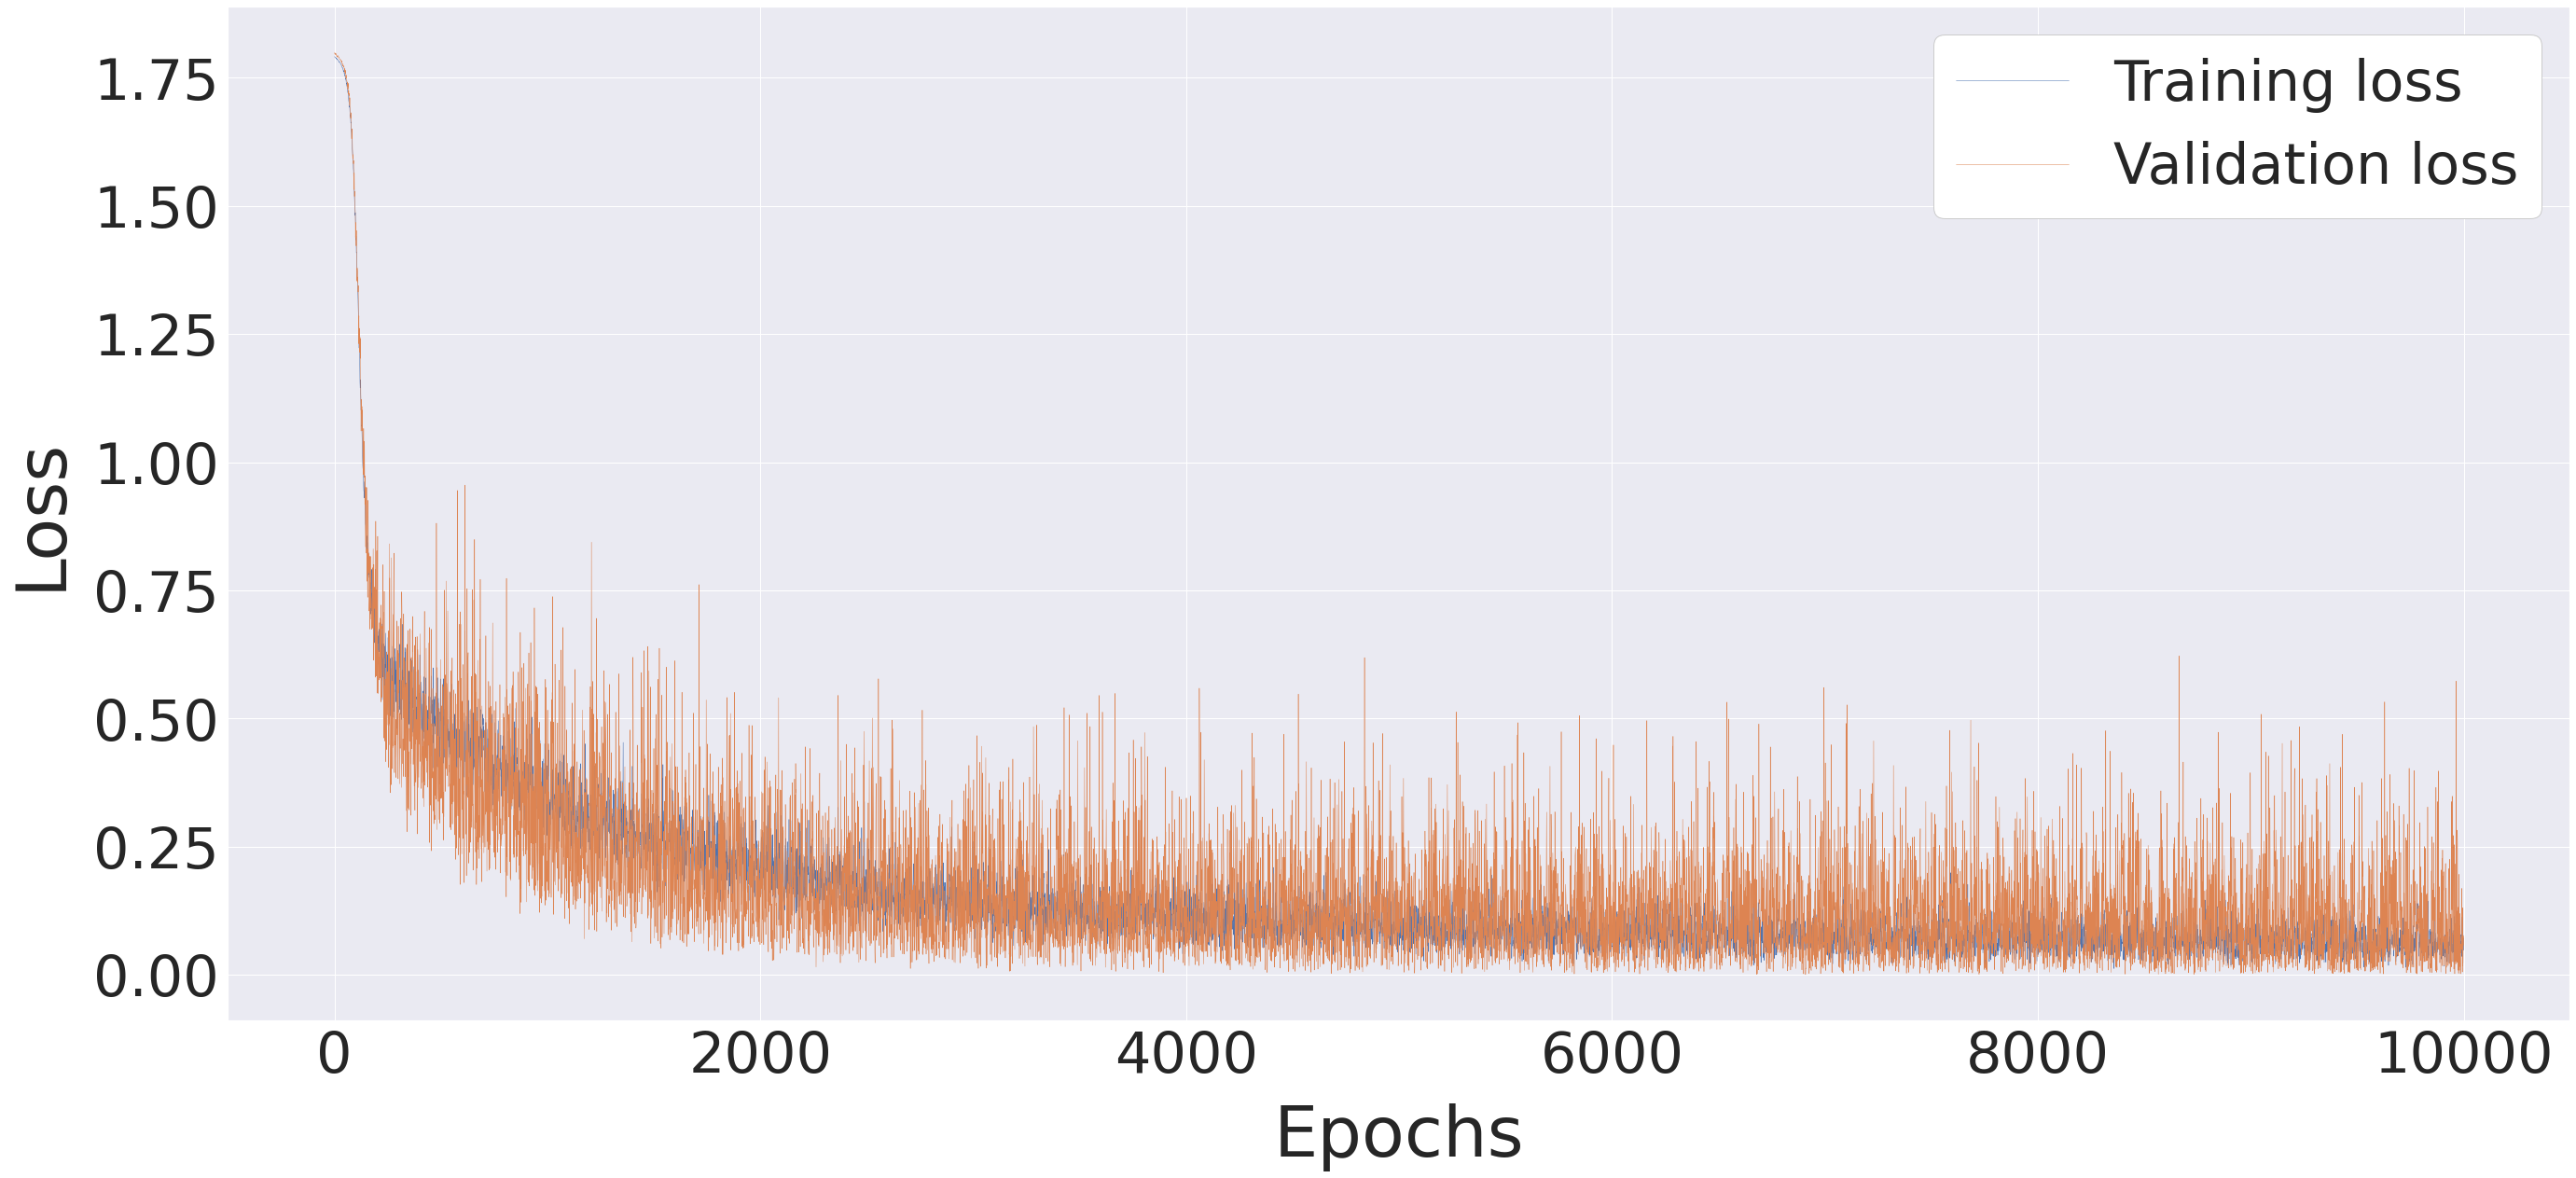

In [330]:
# sns.set(rc={'figure.figsize': (45.0, 20.0)})
# sns.set(font_scale=8.0)
# sns.set_context("notebook", font_scale=5.5, rc={"lines.linewidth": 0.5})
# x_vals = np.arange(0, epochs, 1)
# ax = sns.lineplot(x=x_vals, y=loss_vals_train)
# ax = sns.lineplot(x=x_vals, y=loss_vals_valid)
# ax.set_ylabel('Loss', labelpad=20, fontsize=75)
# ax.set_xlabel('Epochs', labelpad=20, fontsize=75)
# plt.legend(labels=['Training loss', 'Validation loss'], facecolor='white', framealpha=1)
# plt.show()

The MLP can now be applied on the unseen testing data:

In [331]:
# # prepare the model for evaluation
# mlp_classifier.eval()

# # obtain predictions from unseen testing data, and apply argmax
# mlp_preds = mlp_classifier(X_test_tensor)
# mlp_preds = np.argmax(mlp_preds.detach().numpy(), axis=1)

# print("Accuracy:", metrics.accuracy_score(y_test, mlp_preds))

Accuracy: 1.0


The Deep Learning MLP typically displays testing data accuracy scores within a range of 0.90-1.0 (90-100%). With this in mind, the model's lower bounds of accuracy are comparable with the upper ranges of the Gaussian Naive Bayes Classifier and lower ranges of the K-Nearest Neighbour Classifier, but equally also by being capable of achieving 100% accuracy the performance of this classifier can be consistent with the Random Forest Classifier, and the upper ranges of both the Support Vector Classifier and K-Nearest Neighbour Classifier.

## Stage 5: Model Comparison

With these five models having been applied, the accuracy recorded with the testing data in the current kernel will now be compared:

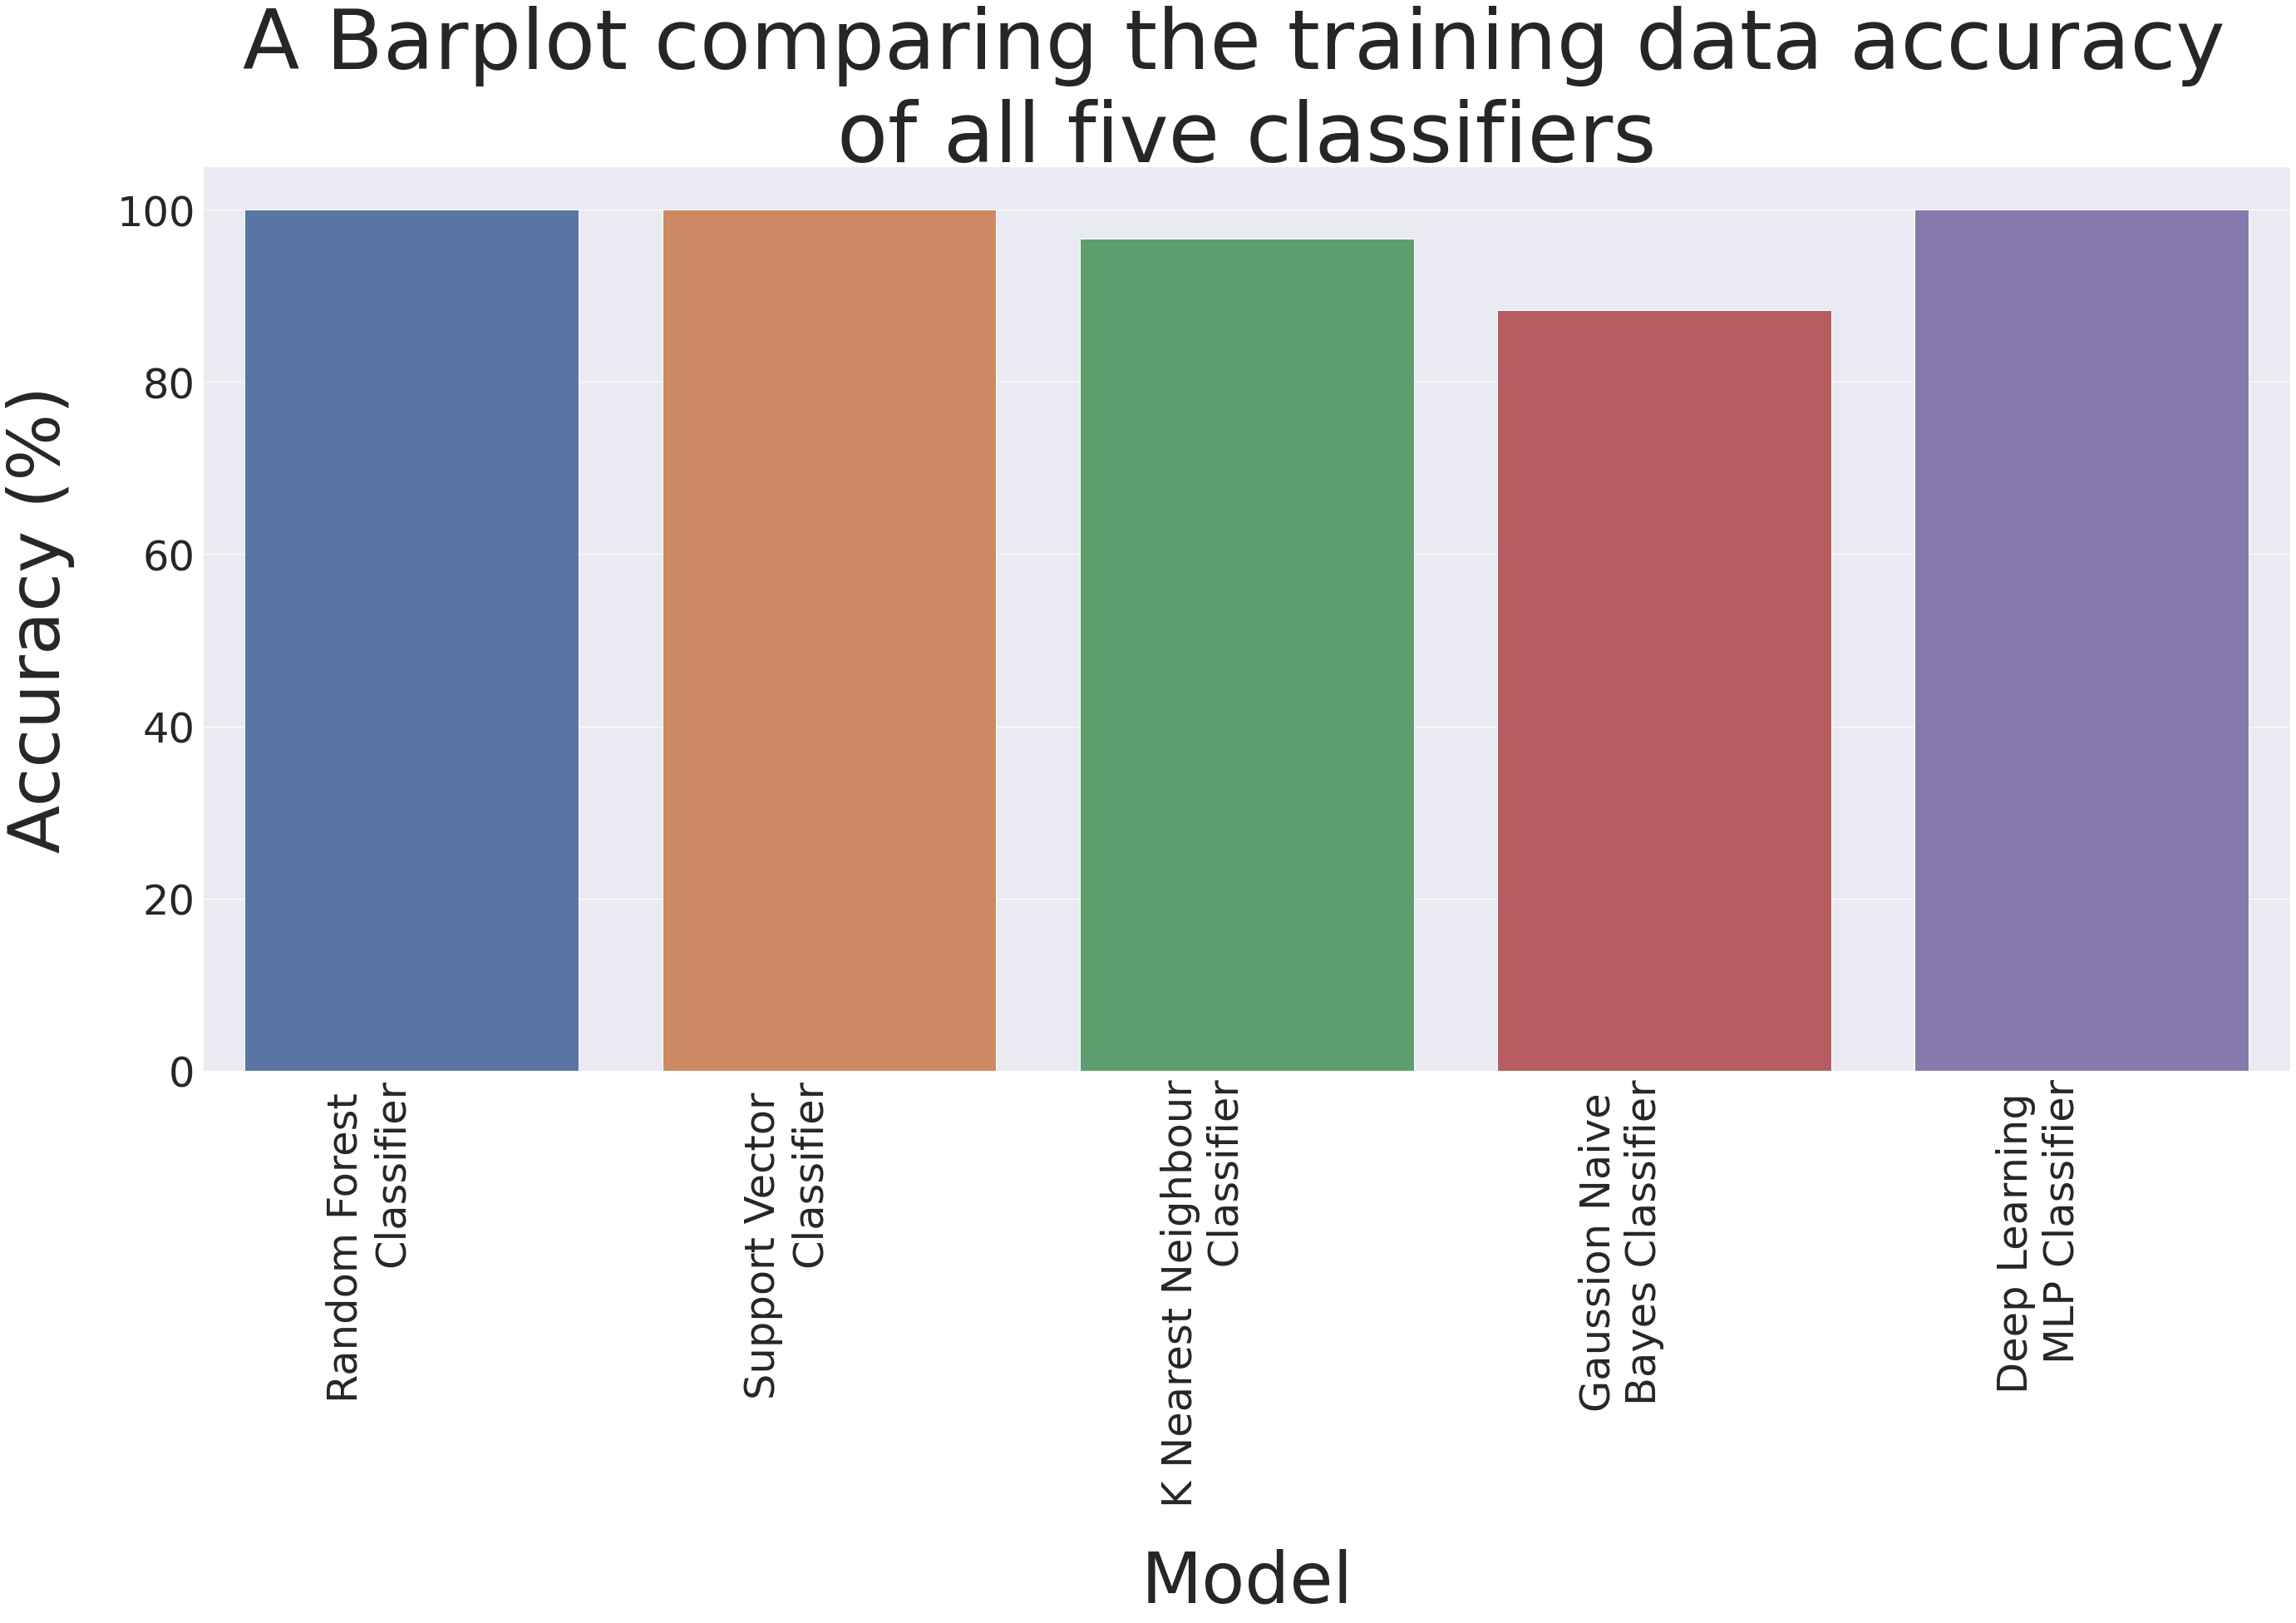

In [333]:
# # convert accuracy scores to percentages and store them as variables
# rfc_acc = metrics.accuracy_score(y_test, rfc_preds) * 100
# svc_acc = metrics.accuracy_score(y_test, svc_preds) * 100
# knc_acc = metrics.accuracy_score(y_test, knc_preds) * 100
# gnc_acc = metrics.accuracy_score(y_test, gnc_preds) * 100
# # mlp_acc = metrics.accuracy_score(y_test, mlp_preds) * 100

# # # place accuracy scores in lists, and then create a dataframe
# # models = ['Random Forest \nClassifier', 'Support Vector \nClassifier', 'K Nearest Neighbour\n Classifier',
# #          'Gaussion Naive \nBayes Classifier', 'Deep Learning \nMLP Classifier']
# # accuracy = [rfc_acc, svc_acc, knc_acc, gnc_acc, mlp_acc]
# # model_comp_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy})

# # # plot a barchart with the accuracy of each model
# # sns.set_context("notebook", font_scale=4.5, rc={"lines.linewidth": 0.5})
# # ax = sns.barplot(x="Model", y="Accuracy", data=model_comp_df)
# # ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# # ax.set_ylabel('Accuracy (%)', labelpad=50, fontsize=85)
# # ax.set_xlabel('Model', labelpad=50, fontsize=85)

# # plt.title("A Barplot comparing the training data accuracy \nof all five classifiers", fontsize=100)
# # plt.show()


As is evident by the range of accuracy scores obtained by the five various models applied, the performance of each model is variable and so will often change between re-runs of this notebook. This is likely due to the random nature of the 'train_test_split()' method, and in the case of the Deep Learning MLP due to the random values of weights assigned prior to model training. Therefore, what is described in the Bar plot above will likely vary each time this notebook is re-run.

Due to the variability in accuracy scores recorded by each model with every re-run, comparison between models is not always obvious. 

However, it is reasonable to conclude that the Random Forest Classifier is the best of the five models investigated. This is due to it usually obtaining 100% accuracy on the testing data.

Additionally, it is also reasonable to conclude that the Gaussian Naive Bayes Classifier is the worst of the five models investigated. This is due to it recording the lowest testing data accuracy scores of all of the models investigated (usually 82-93%), and the fact that all other methods were capable of obtaining 100% accuracy on the testing data.

The Support Vector Classifier, K-Nearest Neighbour Classifier and Deep Learning MLP are unfortunately less clear to compare and rank as they were all capable of obtaining 100% accuracy. However, the Support Vector Classifier was the most consistent of these three with the range of accuracy scores being between 95-100%. As such it may be reasonable for this method to be considered the second best after the Random Forest Classifier. By the same logic, it may therefore be reasonable to conclude that the Deep Learning MLP is the third best overall (testing data accuracy 90-100%), and the K-Nearest Neighbour Classifier is the fourth best (testing data accuracy 88-100%), only better than the Gaussian Naive Bayes Classifier.